<a href="https://colab.research.google.com/github/Hassan-zeidan/Statistics-for-Data-Science/blob/main/Week%202/assignment%202/Practical_Exercise_Distributions_as_Modeling_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Distributions as Modeling Tools**

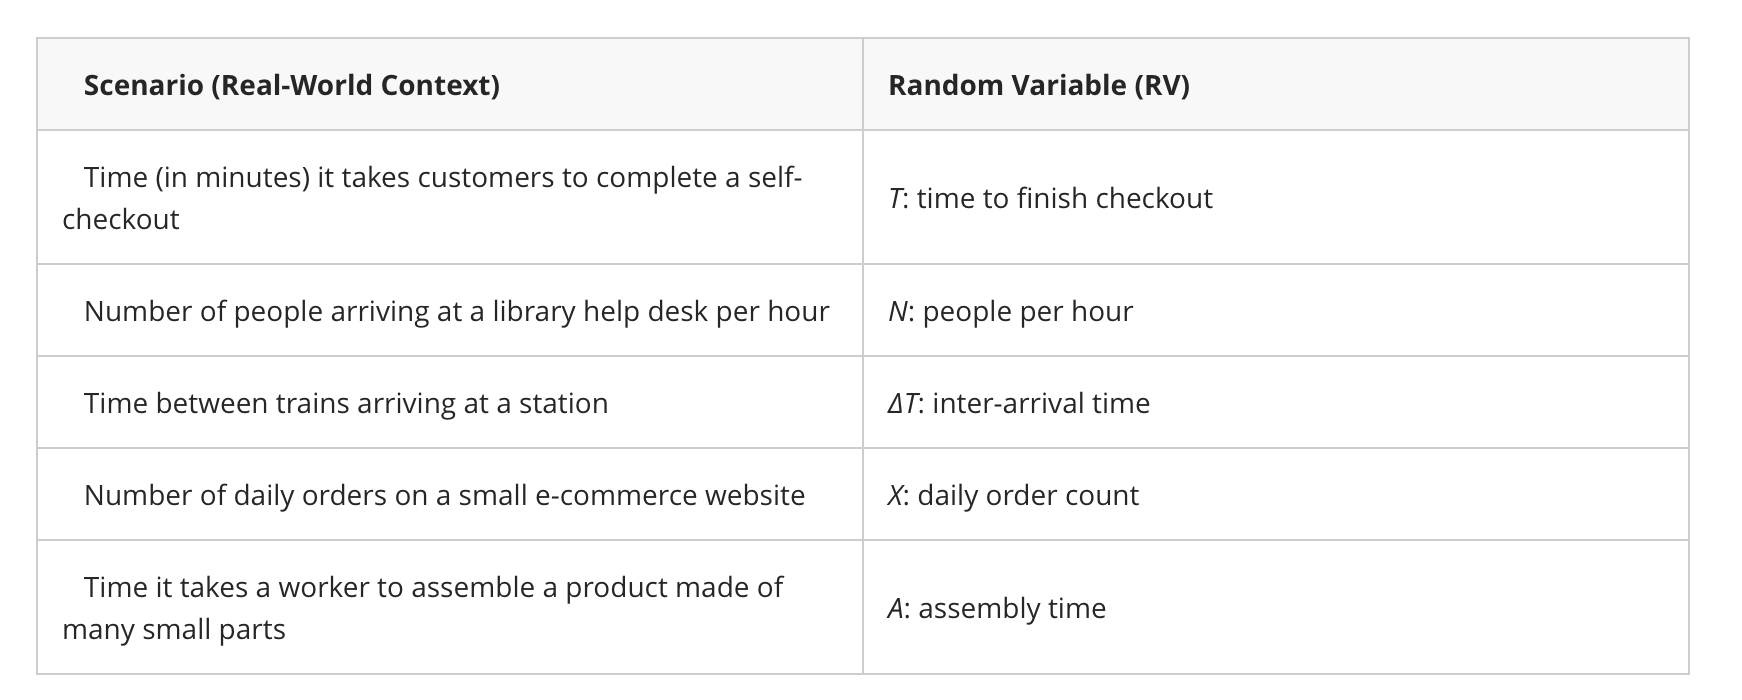

## **Choose two scenarios and complete the following steps:**

**-Understand the context.** Rephrase the scenario in your own words.  
Identify whether the variable is discrete or continuous, and what shape the data might have (e.g., skewed, symmetric).  
**-Choose an appropriate probability distribution.** Select one from the following: uniform, Poisson, exponential, or gamma distribution.  
**-Justify your choice.** Explain why this distribution makes sense based on the nature of the random variable (domain, shape, behavior, etc.).  
**-Simulate the random variable using Python.** Generate at least 100 random values using numpy.random. You may use the distribution command summary table for guidance.  
**-Plot your results.** Create a histogram (and optionally a smooth density curve) to visualize the simulated data.  
**-Calculate summary statistics.** Compute the sample mean and variance using NumPy.  
If possible, compare to the theoretical values for the distribution you chose.  
**-Reflect on your model:**  
--What assumptions did you make?  
--Would another distribution also be appropriate?

# **1) Number of people arriving at a library help desk per hour**

---



**Understand the context:** We observe a fixed, one-hour window and count how many people show up at the library help desk during that hour.  
X = number of arrivals in an hour.  
It’s discrete (values 0,1,2,..).  
Likely shape: Usually right-skewed (most hours near the average, with a small chance of a much bigger count). If the average rate is high, the histogram can look more symmetric

**Choose an appropriate probability distribution:**.
Poisson(λ)

**Justify your choice:**  
We’re counting arrivals in a fixed 1 hour interval. If arrivals are roughly independent and the hourly rate is about constant, counts follow a Poisson model.

**Simulate the random variable using Python:**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import gamma

In [5]:
lam = 8
N = 360 # I made them 360 hours considering that we have 30 days and each day we have 12 hours of opening store
arrivals = np.random.poisson(lam, size=N)

In [11]:
print("First 24 simulated hours:", arrivals[:24])
print("Sample size:", len(arrivals))
print("Sample mean:", round(arrivals.mean(),2))
print("Sample variance:", round(arrivals.var(ddof=1),2))

First 24 simulated hours: [ 6 15  5  9  5  5  8  5  8  5  4 10 10  7  7  6  9  7 10  9 14  4 10  6]
Sample size: 360
Sample mean: 7.89
Sample variance: 8.33


In [13]:
lam_theory = lam
lam_hat = arrivals.mean()

**Plot your results:**

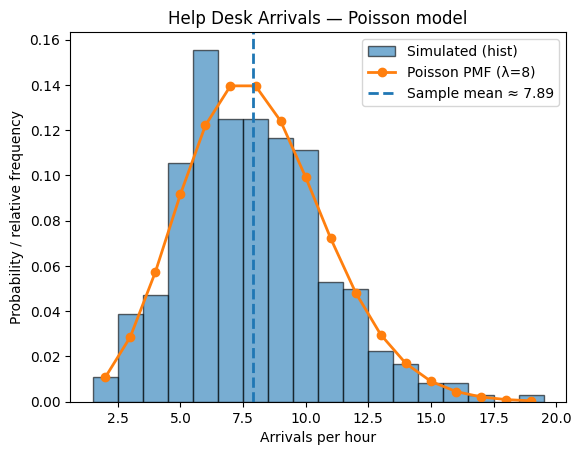

In [15]:
bins = np.arange(arrivals.min(), arrivals.max() + 2) - 0.5
plt.figure()
plt.hist(arrivals, bins=bins, density=True, alpha=0.6, edgecolor='k', label='Simulated (hist)')
k = np.arange(arrivals.min(), arrivals.max() + 1)
pmf = poisson(mu=lam_theory).pmf(k)
plt.plot(k, pmf, marker='o', linewidth=2, label=f'Poisson PMF (λ={lam_theory})')
plt.axvline(lam_hat, linestyle='--', linewidth=2, label=f'Sample mean ≈ {lam_hat:.2f}')
plt.xlabel('Arrivals per hour')
plt.ylabel('Probability / relative frequency')
plt.title('Help Desk Arrivals — Poisson model')
plt.legend()
plt.show()

**Calculate summary statistics:**

In [17]:
lam_hat = arrivals.mean()
var_hat = arrivals.var(ddof=1)

theory_mean = lam
theory_var  = lam

print(f"Sample mean = {lam_hat:.2f}")
print(f"Sample variance = {var_hat:.2f}")
print(f"Theoretical mean = {theory_mean:.2f}")
print(f"Theoretical variance= {theory_var:.2f}")

Sample mean = 7.89
Sample variance = 8.33
Theoretical mean = 8.00
Theoretical variance= 8.00


**Reflect on your model:**

Assumptions

Independent arrivals: one person coming doesn’t affect the next.

Constant rate (per hour): the average pace is steady within each hour.

No simultaneous arrivals: two people at the exact same instant is rare.

Good counting/no blocking: everyone who comes is recorded; no one is turned away.

Comparable hours (if pooled): hours used together have similar conditions.



---



---



---



# **2)Time it takes a worker to assemble a product made of many small parts**

---



**Understand the context:**.
We time how long it takes a worker to finish assembling one product end-to-end (scan parts - fit - clip - test - pack). We repeat this for many products and record each total time.  
T= total assembly time in minutes, continuous, T is greater than or equal to 0.  
Right-skewed (most builds cluster near a typical time, with occasional longer jobs when a sub-step takes extra time)

**Choose an appropriate probability distribution:**  
Gamma Distribution

**Justify your choice:**  
Total time is a sum of multiple positive sub times

**Simulate the random variable using Python:**

In [18]:
alpha = 6.0
theta = 1.5
N = 1000
assembly_times = np.random.gamma(shape=alpha, scale=theta, size=N)
print("First 10 times (min):", np.round(assembly_times[:10], 2))
print("Sample size:", len(assembly_times))

First 10 times (min): [ 8.36 10.14 13.14  9.89 11.8   6.17  8.1   4.85  3.84  6.53]
Sample size: 1000


**Plot your results:**

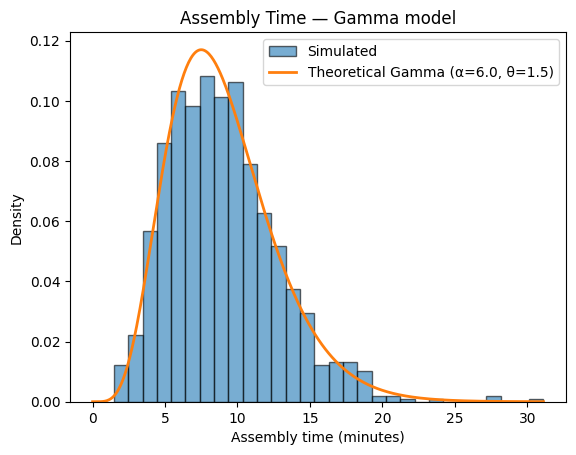

In [21]:
alpha = 6.0
theta = 1.5
plt.figure()
plt.hist(assembly_times, bins=30, density=True, alpha=0.6, edgecolor='k', label='Simulated')

x = np.linspace(0, assembly_times.max(), 400)
pdf = gamma(a=alpha, scale=theta).pdf(x)
plt.plot(x, pdf, linewidth=2, label=f'Theoretical Gamma (α={alpha}, θ={theta})')

plt.xlabel("Assembly time (minutes)")
plt.ylabel("Density")
plt.title("Assembly Time — Gamma model")
plt.legend()
plt.show()

**Calculate summary statistics:**  


In [25]:
mean_hat = assembly_times.mean()
var_hat  = assembly_times.var(ddof=1)
cv_hat   = assembly_times.std(ddof=1) / mean_hat

mean_theory = alpha * theta
var_theory  = alpha * (theta**2)

print(f"Sample mean = {mean_hat:.2f}")
print(f"Sample variance = {var_hat:.2f}")
print(f"Theoretical mean = {mean_theory:.2f}")
print(f"Theoretical variance= {var_theory:.2f}")
print(f"Sample CV = {cv_hat:.2f}")


Sample mean = 8.98
Sample variance = 14.49
Theoretical mean = 9.00
Theoretical variance= 13.50
Sample CV = 0.42


**Reflect on your model:**  
Assumptions:  
Sub steps are independent and similarly variable.

Process conditions are stable .

Times are non-negative and right-skewed (longer delays happen, early finishes bounded below by 0).

Distribution : Normal sometimes for averages of many builds, but not ideal for single build times.